<a href="https://colab.research.google.com/github/gorleramyasri/Leaf-disease-detection/blob/main/ProjectR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
path1='/content/gdrive/MyDrive/ML/TLDDM/TLDD/Dataset'

In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os


In [ ]:

DATASET="train"
DATASET2="valid"


In [ ]:
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus","Rice_Bacterial_leaf_blight","Rice_Brown_spot","Rice_Leaf_smut"]

train_data=[]

In [ ]:
for category in CATEGORIES:
        label=CATEGORIES.index(category) ## 0 for tbs.... labelling
        path=os.path.join(path1,DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            #print(img,type(img))
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            train_data.append([img,label])

In [ ]:

test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(path1,DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [ ]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

for lbl in train_data[:10]:
    print(lbl[1])

6
9
1
2
12
1
9
2
2
10


In [ ]:
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

Y=[]
for i in y_train:
    if i==0:
        Y.append(" TOMATO BACTERIAL SPOT")
    elif i==1:
        Y.append("TOMATO EARLY BLIGHT")
    elif i==2:
        Y.append("TOMATO HEALTHY")
    elif i==3:
        Y.append("TOMATO LATE BLIGHT")
    elif i==4:
        Y.append("TOMATO LEAF MOLD")
    elif i==5:
        Y.append("TOMATO SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("TOMATO SPIDER MITE")
    elif i==7:
        Y.append("TOMATO TARGET SPOT")
    elif i==8:
        Y.append("TOMATO MOSAIC VIRUS")
    elif i==9:
        Y.append("TOMATO YELLOW LEAF CURL VIRUS")
    elif i==10:
        Y.append("RICE BACTERIAL LEAF BLIGHT")
    elif i==11:
        Y.append("RICE BROWN SPOT")
    else:
        Y.append("RICE LEAF SMUT")

len(X_train),len(y_train)

(23721, 23721)

In [ ]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

Z=[]
for i in y_test:
    if i==0:
        Y.append(" TOMATO BACTERIAL SPOT")
    elif i==1:
        Y.append("TOMATO EARLY BLIGHT")
    elif i==2:
        Y.append("TOMATO HEALTHY")
    elif i==3:
        Y.append("TOMATO LATE BLIGHT")
    elif i==4:
        Y.append("TOMATO LEAF MOLD")
    elif i==5:
        Y.append("TOMATO SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("TOMATO SPIDER MITE")
    elif i==7:
        Y.append("TOMATO TARGET SPOT")
    elif i==8:
        Y.append("TOMATO MOSAIC VIRUS")
    elif i==9:
        Y.append("TOMATO YELLOW LEAF CURL VIRUS")
    elif i==10:
        Y.append("RICE BACTERIAL LEAF BLIGHT")
    elif i==11:
        Y.append("RICE BROWN SPOT")
    else:
        Y.append("RICE LEAF SMUT")

len(X_test),len(y_test)

(6091, 6091)

In [ ]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

order=['TOMATO BACTERIAL SPOT','TOMATO EARLY BLIGHT','TOMATO HEALTHY','TOMATO LATE BLIGHT','TOMATO LEAF MOLD','TOMATO SEPTORIA LEAF SPOT','TOMATO SPIDER MITE','TOMATO TARGET SPOT','TOMATO MOSAIC VIRUS','TOMATO YELLOW LEAF CURL VIRUS','RICE BACTERIAL LEAF BLIGHT','RICE BROWN SPOT','RICE LEAF SMUT']

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(64,64,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                             

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from tensorflow.python.keras import regularizers
model = Sequential()
model.add(restnet)
model.add(Dense(activation='relu',kernel_regularizer=regularizers.l2(0.001), units=64))
model.add(Dense(activation='relu',kernel_regularizer=regularizers.l2(0.001), units=64))
model.add(Dense(activation='relu',kernel_regularizer=regularizers.l2(0.001), units=64))
model.add(Dense(activation='softmax',kernel_regularizer=regularizers.l2(0.001), units=13))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 8192)              23587712  
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 13)                845       
                                                                 
Total params: 24,121,229
Trainable params: 533,517
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Epoch 1/150
75/75 [==============================] - 6s 86ms/step - loss: 1.1159 - accuracy: 0.6676 - val_loss: 1.2052 - val_accuracy: 0.6320
Epoch 2/150
75/75 [==============================] - 6s 84ms/step - loss: 1.1222 - accuracy: 0.6649 - val_loss: 1.2691 - val_accuracy: 0.6019
Epoch 3/150
75/75 [==============================] - 6s 85ms/step - loss: 1.1277 - accuracy: 0.6626 - val_loss: 1.2433 - val_accuracy: 0.6158
Epoch 4/150
75/75 [==============================] - 6s 85ms/step - loss: 1.1286 - accuracy: 0.6624 - val_loss: 1.1974 - val_accuracy: 0.6341
Epoch 5/150
75/75 [==============================] - 6s 86ms/step - loss: 1.1343 - accuracy: 0.6569 - val_loss: 1.2967 - val_accuracy: 0.5994
Epoch 6/150
75/75 [==============================] - 6s 85ms/step - loss: 1.1249 - accuracy: 0.6588 - val_loss: 1.2855 - val_accuracy: 0.5937
Epoch 7/150
75/75 [==============================] - 6s 86ms/step - loss: 1.1199 - accuracy: 0.6654 - val_loss: 1.1980 - val_accuracy: 0.6373
Epoch 

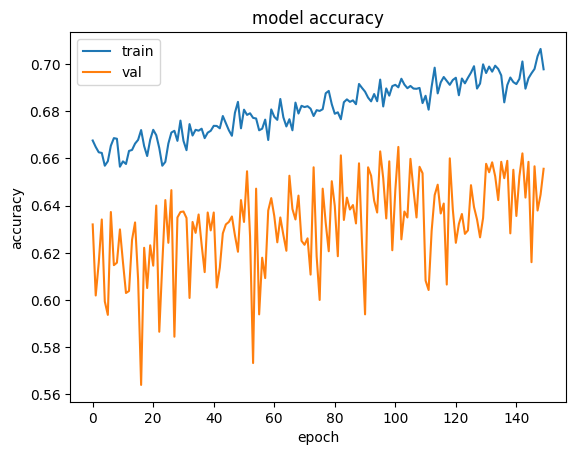

In [ ]:
import keras
import matplotlib.pyplot as plt
history = model.fit(X_train, one_hot_train,validation_split = 0.2, epochs=150, batch_size=256)
path2= "/content/gdrive/MyDrive/ML/TLDDM/TLDD/weights/"

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save(path2+'my_model7.h5')



# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Saved exp

In [ ]:

# Create and train a new model instance.
#model = create_model()
model.fit(X_train,one_hot_train,epochs=150,batch_size=512,validation_split=0.2)
path2= "/content/gdrive/MyDrive/ML/TLDDM/TLDD/weights/"

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save(path2+'my_model1.h5')

Epoch 1/150
38/38 [==============================] - 13s 211ms/step - loss: 2.4421 - accuracy: 0.1472 - val_loss: 2.2143 - val_accuracy: 0.2185
Epoch 2/150
38/38 [==============================] - 6s 169ms/step - loss: 2.0710 - accuracy: 0.2678 - val_loss: 1.9567 - val_accuracy: 0.2790
Epoch 3/150
38/38 [==============================] - 7s 174ms/step - loss: 1.8580 - accuracy: 0.3299 - val_loss: 1.8496 - val_accuracy: 0.3115
Epoch 4/150
38/38 [==============================] - 8s 208ms/step - loss: 1.7322 - accuracy: 0.3730 - val_loss: 1.7165 - val_accuracy: 0.3697
Epoch 5/150
38/38 [==============================] - 8s 213ms/step - loss: 1.6488 - accuracy: 0.4006 - val_loss: 1.6637 - val_accuracy: 0.3937
Epoch 6/150
38/38 [==============================] - 8s 210ms/step - loss: 1.5984 - accuracy: 0.4210 - val_loss: 1.5551 - val_accuracy: 0.4293
Epoch 7/150
38/38 [==============================] - 7s 175ms/step - loss: 1.5444 - accuracy: 0.4402 - val_loss: 1.5431 - val_accuracy: 0.428

In [ ]:

# Create and train a new model instance.
#model = create_model()
model.fit(X_train,one_hot_train,epochs=150,batch_size=128,validation_split=0.2)
path2= "/content/gdrive/MyDrive/ML/TLDDM/TLDD/weights/"

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save(path2+'my_model4.h5')

#TEST + PREDICT


In [ ]:
path2= "/content/gdrive/MyDrive/ML/TLDDM/TLDD/weights/"
path2+'my_model7.h5'

'/content/gdrive/MyDrive/ML/TLDDM/TLDD/weights/my_model7.h5'

In [ ]:
import tensorflow as tf
from tensorflow import keras
new_model = tf.keras.models.load_model(path2+'my_model7.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 8192)              23587712  
                                                                 
 dense_4 (Dense)             (None, 64)                524352    
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 13)                845       
                                                                 
Total params: 24,121,229
Trainable params: 533,517
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from keras.utils import to_categorical
one_hot_test=to_categorical(y_test)
one_hot_test
test_loss,test_acc=new_model.evaluate(X_test,one_hot_test)
test_loss,test_acc

191/191 [==============================] - 13s 16ms/step - loss: 1.1921 - accuracy: 0.6538


(1.1920783519744873, 0.6537514328956604)

In [ ]:
def classname(i):
  switcher = {
      0:"TOMATO BACTERIAL SPOT",
      1:"TOMATO EARLY BLIGHT",
      2:"TOMATO HEALTHY",
      3:"TOMATO LATE BLIGHT",
      4:"TOMATO LEAF MOLD",
      5:"TOMATO SEPTORIA LEAF SPOT",
      6:"TOMATO SPIDER MITE",
      7:"TOMATO TARGET SPOT",
      8:"TOMATO MOSAIC VIRUS",
      9:"TOMATO YELLOW LEAF CURL VIRUS",
      10:"RICE BACTERIAL LEAF BLIGHT ",
      11:"RICE BROWN SPOT ",
      12:"RICE LEAF SMUT "
        }
  return switcher.get(i,"nothing")

In [ ]:
path="/content/gdrive/MyDrive/ML/TLDDM/TLDD/Dataset/Random/Rice1.jpg"
img1=cv.imread(path,1)
img=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img=cv.resize(img,(64,64))

In [ ]:

img=np.array(img).reshape(-1,64,64,3)
#print(img,img.shape)
img=img/255.0
#print("image",img,img.shape)

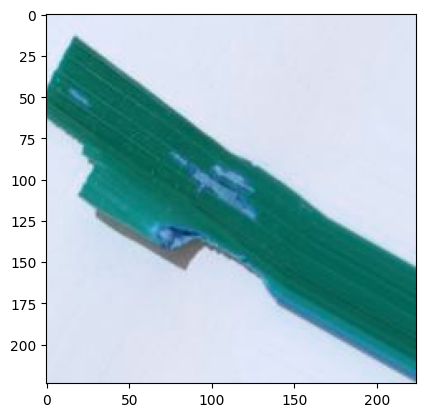

In [ ]:
plt.imshow(img1)

In [ ]:
y_pred=np.argmax(new_model.predict(img))
y_pred
classname(y_pred)

1/1 [==============================] - 0s 38ms/step


'RICE BACTERIAL LEAF BLIGHT '

# **DATA GENERATION OF RICE LEAF**

In [ ]:

import os

dir_path = r'/content/gdrive/MyDrive/ML/TLDDM/TLDD/Dataset/rice_leaf_diseases/Bacterial_leaf_blight'
print(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

In [ ]:
CATEGORIES=["Bacterial_leaf_blight","Brown_spot","Leaf_smut"]

In [ ]:
original_dataset_path = "/content/gdrive/MyDrive/ML/TLDDM/TLDD/Dataset/rice_leaf_diseases/"
augmented_images_path = "/content/gdrive/MyDrive/ML/TLDDM/TLDD/Dataset/rice_leaf_diseases/NewBLB/"

In [ ]:
import os
import numpy as np
import cv2 as cv
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
for category in CATEGORIES:
        label=CATEGORIES.index(category) ## 0 for tbs.... labelling
        path=os.path.join(original_dataset_path,category)


In [ ]:
# Data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Loop over the categories and generate new images
for category in CATEGORIES:
    print(f"Generating images for {category}...")
    category_path = os.path.join(augmented_images_path, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)

    # Load original images
    image_paths = [f for f in os.listdir(os.path.join(original_dataset_path, category)) if os.path.splitext(f)[1] in [".jpg", ".jpeg", ".png"]]
    images = []
    for image_path in image_paths:
        image = Image.open(os.path.join(original_dataset_path, category, image_path))
        image = image.resize((img_width, img_height))
        image = np.array(image)
        images.append(image)

    # Generate new images using data augmentation
    i = 0
    for batch in datagen.flow(np.array(images), batch_size=1, save_to_dir=category_path, save_prefix=category, save_format="jpg"):
        i += 1
        if i >= 2100:  # Generate 40 images for each category
            break

print("Done generating images.")


In [ ]:
import os
import shutil

source_folder = "/content/gdrive/MyDrive/ML/TLDDM/TLDD/Dataset/rice_leaf_diseases/Brown_spot"
destination_folder = "/content/gdrive/MyDrive/ML/TLDDM/TLDD/Dataset/rice_leaf_diseases/NewBLB/Brown_spot"

# create the destination folder if it doesn't already exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# loop through all the files in the source folder
c=0
for filename in os.listdir(source_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # construct the full file paths
        src_path = os.path.join(source_folder, filename)
        dst_path = os.path.join(destination_folder, filename)
        c+=1
        if c>=90:
          break

        # move the file to the destination folder
        shutil.move(src_path, dst_path)


In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#resnet50 trails

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(64,64,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
# Define a function that returns a compiled Keras model
def create_model(u1=64,u2=128,u3=64, optimizer='adam'):
    model = Sequential()
    model.add(restnet)
    u1=64
    u2=128
    u3=64
    model.add(Dense(activation='relu', units=u1))
    model.add(Dense(activation='relu', units=u2))
    model.add(Dense(activation='relu', units=u3))
    model.add(Dense(activation='softmax', units=13))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameters grid
param_grid = {'u1': [32, 64, 128],'u2': [32, 64, 128],'u2': [32, 64, 128],
              'optimizer': ['adam', 'rmsprop']}

# Use GridSearchCV to search over the hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-15-298396fe8b19>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=0)


248/248 [==============================] - 4s 12ms/step


In [ ]:
from keras.utils import to_categorical

one_hot_train=to_categorical(y_train)

one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:

# Create and train a new model instance.
#model = create_model()
model.fit(X_train,one_hot_train,epochs=150,batch_size=512,validation_split=0.2)
path2= "/content/gdrive/MyDrive/ML/TLDDM/TLDD/weights/"

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save(path2+'my_model6.h5')